### Import libraries and file

In [2]:
import pandas as pd
import csv
import numpy as np
import warnings
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import complete, fcluster
from scipy.cluster.hierarchy import linkage
import seaborn as sns
from kmedoids import kmedoids

### Load npy file

In [3]:
matrix = np.load('/mnt/files/matrix.npy')

### Result Shapes

In [4]:
matrix.shape

(95458, 1226)

### Slicing consider similar objects

In [5]:
row_idx = np.array([6,9,17,64,75,105,113,128,132,167,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,258,370,398,415,453,491,496,520,524,535,541,559,560,564,613,620,667,684,734,784,805,811,812,814,881,965,968,990,1008,1016,1020,1157,1199,1260,1269,1299,1300,1312,1420,1452,1453,1606,1746,1758,1784,1815,1816,1818,1837,1839,1841,1842,1997,2161,2162,2165,2319,2320,2321,2322,2330,2353,2365,2409,2418,2462,2490,2528,2546,2588,2612,2617,2629,2631,2694,2695,2696,2697,2700,2704,2713,2719,2746,2766,2782,2794,2818,2838,2851,2998,2999,3027,3028,3052,3053,3054,3056,3057,3104,3106,3115,3117,3118,3119,3173,3176,3177,3240,3246,3282,3294,3298,3307,3317,3336,3363,3372,3452,3473,3609,3613,3615,3619,3670,3675,3711,3713,3795,3820,3865,3921,3922,3957,3960,3979,4004,4006,4007,4015,4061,4066,4086,4150,4159,4173,4182,4189,4193,4194,4247,4253,4266,4288,4315,4360,4439,4445,4456,4503,4521,4528,4538,4539,4571,4619,4636,4637,4661,4662,4668,4799,4859,4860,4865,4866,4938,5165,5166,5167,5175,5200,5312,5320,5378,5399,5401,5405,5412,5447,5463,5482,5483,5484,5485,5486,5487,5488,5535,5536,5551,5566,5568,5571,5598,5604,5619,5639,5689,5721,5784,5785,5786,5787,5788,5789,5790,5791,5929,5930,5939,5960,6027,6028,6030,6037,6068,6101,6158,6167,6181,6198,6236,6251,6262,6270,6278,6312,6349,6352,6370,6371,6391,6409,6417,6420,6422,6424,6426,6466,6508,6511,6521,6569,6588,6664,6734,6735,6736,6737,6738,6739,6745,6766,6780,6781,6782,6850,6885,6918,6936,6949,6994,7036,7043,7060,7065,7066,7067,7077,7110,7172,7173,7187,7188,7189,7190,7191,7192,7193,7194,7195,7196,7197,7198,7199,7200,7201,7202,7203,7204,7205,7206,7207,7208,7209,7210,7211,7212,7222,7249,7302,7303,7304,7305,7336,7337,7356,7458,7465,7480,7495,7570,7572,7581,7582,7583,7584,7596,7608,7622,7635,7720,7722,7731,7742,7794,7796,7797,7798,7799,7805,7812,7822,7827,7943,7966,7970,7984,7995,7997,8017,8021,8022,8023,8035,8069,8073,8076,8114,8115,8116,8117,8118,8119,8120,8121,8122,8123,8124,8125,8231,8234,8238,8335,8382,8470,8471,8472,8473,8474,8489,8518,8548,8549,8591,8593,8619,8657,8738,8746,8764,8808,8811,8820,8830,8864,8866,8874,8934,8976,8977,9115,9172,9185,9245,9290,9295,9312,9347,9357,9358,9370,9371,9372,9384,9394,9410,9414,9434,9458,9575,9759,9806,9838,9904,9906,9931,9943,9951,9952,10054,10103,10119,10131,10141,10153,10216,10222,10223,10239,10247,10259,10291,10305,10315,10366,10370,10372,10377,10379,10381,10383,10468,10494,10500,10519,10524,10532,10534,10536,10537,10538,10539,10540,10549,10552,10604,10687,10694,10800,10869,10876,10894,10895,10896,10897,10898,10899,10900,10974,11007,11118,11144,11157,11166,11167,11170,11171,11172,11174,11175,11178,11185,11195,11202,11226,11227,11228,11236,11247,11255,11257,11261,11263,11271,11283,11284,11285,11286,11287,11288,11302,11303,11312,11341,11350,11364,11365,11376,11383,11459,11460,11464,11468,11521,11539,11549,11550,11613,11679,11746,11847,11875,11894,11919,11922,11927,11943,11945,12023,12027,12067,12068,13112,13334,13402,13433,13496,13497,13498,13499,13500,13501,13502,13566,13574,13611,13860,13881,13888,14021,14147,14309,14310,14311,14422,14437,14445,14585,14624,14632,14647,14661,14663,14664,14665,14696,14807,14822,14910,14932,14933,14981,14983,14987,15017,15049,15072,15081,15087,15089,15175,15184,15186,15214,15228,15243,15250,15265,15272,15277,15284,15520,15521,15523,15528,15620,15621,15628,15667,15675,15697,15717,15723,15734,15736,15750,15865,15897,15914,15917,15929,15930,15951,15963,15967,15976,15978,16002,16022,16049,16093,16098,16131,16178,16218,16241,16242,16243,16263,16281,16417,16418,16423,16450,16486,16487,16605,16607,16628,16632,16646,16697,16737,16785,16856,16858,16878,16989,17113,17114,17131,17132,17143,17186,17215,17216,17217,17221,17222,17243,17341,17342,17343,17373,17374,17405,17427,17463,17505,17613,17725,17733,17841,17844,17874,17878,17883,17946,17956,17963,17979,18023,18073,18074,18075,18077,18085,18087,18103,18110,18121,18416,18422,18488,18530,18601,18622,18624,18629,18676,18691,18731,18735,18757,18776,18781,18812,18823,18840,18842,18843,18845,18847,18848,18849,18850,18851,18853,18854,18855,18856,18857,18888,18892,18917,18977,19069,19116,19159,19160,19186,19459,19483,19484,19488,19522,19534,19535,19536,19537,19538,19539,19588,19631,19670,19748,19755,19756,19792,19815,19874,19891,19910,20011,20199,20202,20210,20212,20238,20243,20286,20287,20294,20300,20322,20356,20393,20395,20415,20441,20458,20564,20623,20682,20724,20725,20727,20729,20797,20798,20833,20836,20837,20947,20951,20964,20966,20996,21123,21151,21158,21248,21267,21268,21338,21396,21398,21399,21401,21412,21418,21450,21467,21743,21771,21809,21810,21817,21867,21921,22254,22262,22263,22290,22372,22375,22387,22432,22464,22465,22484,22485,22507,22539,22583,22596,22598,22635,22707,22708,22766,22790,22795,22805,22850,22909,22914,22947,22964,22986,23007,23052,23056,23060,23065,23094,23119,23125,23132,23256,23260,23316,23317,23318,23319,23333,23530,23571,23590,23618,23621,23644,23716,23717,23718,23780,23810,23830,23857,23883,23958,23966,23975,24004,24008,24028,24029,24043,24051,24052,24053,24054,24059,24062,24066,24070,24075,24180,24262,24269,24280,24441,24461,24462,24488,24502,24509,24510,24511,24540,24541,24544,24576,24631,24639,24716,24847,24856,24955,25007,25345,25346,25388,25408,25410,25416,25436,25442,25489,25566,25598,25624,25625,25632,25635,25636,25637,25638,25639,25640,25650,25663,25664,25781,25782,25784,25786,25833,25876,25881,25886,25894,25919,25922,25970,26082,26083,26084,26085,26086,26087,26161,26166,26173,26224,26261,26265,26270,26277,26278,26298,26299,26319,26379,26399,26528,26534,26605,26614,26626,26637,26651,26655,26692,26700,26728,26729,26730,26747,26770,26771,26840,26842,26918,26936,26967,26970,26974,26980,26983,27003,27018,27022,27023,27034,27035,27036,27037,27397,27439,27451,27452,27481,27484,27534,27538,27681,27714,27715,27716,27717,27718,27721,27728,27778,27781,27816,27932,28054,28151,28253,28296,28301,28385,28617,28661,28682,28716,28773,28794,28856,28857,28905,28961,28964,28999,29028,29064,29069,29135,29260,29261,29262,29318,29320,29404,29405,29432,29461,29462,29498,29499,29500,29562,29566,29627,29673,29875,29886,29902,29911,29915,29970,29971,30029,30045,30053,30054,30055,30056,30057,30058,30059,30060,30061,30062,30064,30090,30099,30112,30130,30135,30174,30175,30188,30214,30218,30239,30257,30277,30278,30297,30399,30400,30416,30489,30544,30660,30718,30722,30831,30853,30898,30967,31036,31058,31123,31125,31244,31245,31246,31247,31248,31249,31250,31251,31252,31253,31254,31255,31256,31257,31273,31282,31391,31392,31409,31450,31457,31557,31608,31628,31783,31785,31789,31852,31908,31941,31942,31951,31952,31954,31958,31970,32007,32013,32023,32029,32049,32068,32076,32181,32183,32185,32196,32200,32273,32274,32275,32276,32277,32278,32279,32294,32299,32303,32331,32336,32349,32362,32392,32393,32394,32400,32427,32433,32474,32538,32569,32587,32614,32615,32616,32617,32618,32706,32738,32762,32771,32772,32773,32774,32775,32776,32777,32778,32779,32780,32781,32782,32783,32784,32785,32786,32787,32788,32789,32790,32791,32792,32816,32817,32877,32882,32894,32899,32915,33038,33062,33074,33079,33090,33092,33093,33163,33191,33192,33198,33221,33228,33299,33333,33353,33366,33381,33382,33509,33510,33677,33678,33680,33681,33682,33683,33684,33685,33686,33687,33688,33689,33690,33691,33699,33702,33703,33722,33747,33752,33795,33796,33797,33798,33803,33831,33989,33996,33997,34005,34006,34041,34068,34086,34100,34161,34188,34270,34363,34437,34445,34452,34479,34500,34506,34508,34509,34510,34512,34513,34523,34576,34703,34811,34821,34828,34843,34867,34879,34897,34898,34917,34925,34965,34966,34967,35002,35012,35038,35072,35073,35074,35075,35077,35133,35142,35196,35207,35212,35213,35215,35216,35223,35382,35390,35411,35417,35419,35425,35583,35605,35606,35662,35681,35691,35819,35842,35843,35878,35879,35880,35881,35956,35957,35969,35983,36000,36056,36062,36066,36091,36098,36120,36122,36123,36166,36176,36182,36187,36207,36269,36275,36276,36277,36278,36279,36281,36282,36320,36321,36363,36403,36449,36457,36514,36550,36565,36591,36610,36612,36759,36761,36762,36763,36764,36765,36766,36767,36768,36769,36882,36899,36926,36928,36958,36959,36965,37030,37049,37058,37059,37074,37076,37077,37078,37085,37088,37115,37120,37121,37123,37130,37177,37210,37264,37265,37266,37267,37268,37269,37270,37271,37272,37273,37274,37275,37276,37363,37413,37437,37448,37449,37463,37500,37534,37538,37539,37564,37593,37613,37672,37747,37777,37778,37779,37780,37805,37817,37845,37846,37855,38560,38565,38588,38605,38617,38630,38637,38696,38707,38808,39061,39065,39069,39084,39107,39131,39156,39157,39202,39218,39231,39248,39309,39311,39345,39409,39453,39503,39522,39523,39659,39666,39673,39675,39703,39753,39757,39777,39817,39822,39836,39882,39901,39928,39929,39930,39931,39985,40023,40107,40165,40166,40191,40247,40248,40259,40278,40292,40319,40320,40432,40455,40463,40584,40586,40618,40820,40826,40834,40891,40904,40912,40928,40969,40977,40984,40995,41048,41157,41197,41198,41200,41243,41249,41255,41304,41306,41307,41308,41311,41313,41379,41389,41488,41524,41525,41536,41542,41546,41547,41562,41563,41591,41616,41651,41654,41656,41657,41663,41683,41685,41817,41818,41923,41925,41965,42067,42087,42137,42266,42303,42370,42371,42408,42449,42454,42480,42645,42670,42673,42704,42705,42817,42834,42850,42907,42922,42923,42924,42925,42940,42948,43007,43049,43096,43137,43412,43454,43459,43471,43506,43545,43573,43605,43634,43636,43639,43643,43653,43685,43697,43819,43835,43891,43907,43914,43936,43937,43938,43939,43943,43967,43979,43984,44031,44130,44134,44237,44275,44279,44305,44306,44307,44308,44310,44311,44312,44313,44314,44315,44316,44317,44318,44319,44324,44379,44396,44427,44443,44472,44473,44517,44518,44519,44520,44521,44525,44566,44567,44571,44622,44626,44633,44634,44635,44652,44677,44703,44707,44708,44719,44816,44823,44850,44854,44866,44932,44946,44953,44954,44980,44983,45036,45095,45133,45241,45242,45270,45273,45317,45329,45365,45415,45425,45430,45456,45535,45596,45619,45798,45802,45825,45869,45940,45941,45942,45943,45944,45945,45968,45990,46185,46192,46212,46223,46234,46244,46313,46382,46611,46614,46658,46673,46674,46681,46704,46721,46733,46773,46774,46836,46902,46935,46940,46941,46943,46967,47059,47080,47098,47190,47191,47298,47320,47322,47449,47470,47501,47502,47507,47508,47577,47589,47670,47700,47723,47730,47733,47763,47800,47819,47853,47885,47893,47951,47983,48019,48020,48080,48084,48098,48101,48195,48200,48208,48240,48241,48300,48351,48407,48449,48631,48644,48652,48660,48712,48748,48751,48757,48758,48832,48833,48874,48907,48912,48942,49096,49130,49209,49212,49330,49346,49360,49361,49377,49378,49507,49513,49555,49561,49616,49632,49637,49656,49664,49665,49679,49705,49706,49725,49846,49907,49908,49916,49927,49931,49933,49934,49964,49969,49993,50044,50143,50149,50179,50197,50242,50293,50294,50316,50352,50455,50479,50496,50509,50513,50635,50638,50699,50702,50737,50787,50916,50918,51021,51099,51146,51224,51248,51280,51282,51317,51339,51346,51373,51381,51395,51396,51399,51400,51408,51423,51424,51425,51426,51427,51459,51473,51492,51525,51557,51668,51695,51735,51739,51740,51741,51743,51765,51770,51775,51790,51878,51905,51959,51969,51985,51993,52031,52034,52041,52130,52135,52212,52216,52233,52300,52323,52328,52333,52377,52417,52418,52419,52420,52421,52429,52437,52497,52515,52524,52660,52661,52683,52684,52695,52752,52764,52795,52938,53029,53058,53072,53085,53086,53087,53112,53113,53114,53115,53116,53117,53118,53145,53235,53269,53291,53292,53319,53325,53333,53361,53363,53450,53453,53467,53481,53513,53522,53531,53535,53537,53541,53549,53582,53594,53598,53678,53708,53729,53735,53736,53737,53760,53761,53762,53772,53774,53790,53791,53792,53831,53894,53946,53947,53967,54124,54128,54143,54148,54149,54150,54159,54185,54309,54375,54376,54380,54382,54398,54406,54407,54414,54415,54416,54417,54418,54419,54428,54466,54467,54476,54508,54510,54541,54542,54570,54615,54616,54677,54718,54745,54784,54785,54790,54791,54814,54819,54858,54914,54934,54980,54981,54991,55002,55031,55057,55059,55078,55089,55096,55115,55166,55171,55172,55184,55203,55211,55280,55330,55351,55355,55442,55468,55482,55503,55504,55536,55538,55539,55540,55541,55542,55593,55637,55715,55736,55816,55861,55887,55889,55919,55923,55925,55927,55955,55956,55957,55958,55987,56068,56101,56179,56188,56190,56245,56247,56292,56322,56338,56422,56477,56489,56491,56497,56506,56511,56513,56517,56550,56571,56590,56591,56606,56675,56687,56694,56732,56737,56829,56839,56925,56930,56931,56935,56936,56939,56949,56988,57007,57010,57027,57055,57062,57063,57074,57102,57157,57158,57203,57220,57590,57591,57592,57696,57708,57782,57798,57827,57869,57875,57876,57880,57934,57974,57992,58002,58019,58038,58039,58066,58139,58154,58273,58277,58304,58350,58376,58378,58379,58380,58382,58386,58399,58416,58432,58434,58500,58532,58613,58621,58693,58704,58718,58761,58790,58801,58840,58845,58846,58847,58848,58849,58850,58851,58852,58853,58854,58855,58856,58857,58858,58859,58860,58861,58862,58863,58864,58865,58866,58980,58981,58991,59000,59012,59014,59042,59052,59073,59128,59253,59256,59257,59271,59291,59294,59365,59418,59470,59473,59475,59484,59489,59493,59525,59552,59566,59603,59673,59736,59758,59775,59776,59818,59851,59909,60021,60039,60040,60049,60098,60108,60117,60177,60181,60199,60205,60222,60224,60225,60232,60237,60299,60300,60301,60317,60322,60335,60435,60437,60501,60575,60588,60641,60642,60690,60721,60722,60746,60758,60759,60768,60808,60813,60834,60846,60866,60964,60974,61084,61096,61160,61165,61168,61219,61238,61262,61295,61302,61391,61392,61395,61565,61597,61623,61626,61645,61664,61678,61749,61759,61784,61859,61882,61886,61966,61967,61970,62098,62120,62281,62282,62308,62387,62409,62422,62428,62445,62446,62529,62538,62542,62544,62550,62579,62580,62597,62640,62690,62693,62695,62704,62837,62839,62861,62952,62983,62999,63051,63101,63132,63164,63205,63314,63345,63401,63403,63419,63420,63441,63488,63489,63505,63532,63533,63584,63600,63614,63626,63629,63654,63660,63661,63743,63793,63865,63963,64042,64107,64123,64125,64126,64144,64188,64193,64195,64218,64226,64229,64323,64332,64372,64423,64458,64657,64685,64787,64859,64862,64874,64989,65009,65022,65035,65074,65076,65136,65186,65212,65247,65280,65312,65317,65525,65526,65527,65574,65623,65629,65644,65653,65655,65669,65725,65726,65755,65764,65803,65806,65810,65822,65823,65848,65857,65880,65881,65891,65892,65997,66031,66035,66045,66054,66072,66135,66143,66163,66164,66178,66179,66180,66356,66396,66414,66416,66417,66482,66483,66567,66568,66581,66586,66619,66653,66736,66792,66843,66909,66910,66914,66927,67035,67050,67052,67053,67128,67134,67671,67762,67773,67810,67888,67904,67910,67936,67964,67965,68008,68009,68012,68013,68014,68017,68018,68019,68020,68021,68023,68025,68028,68073,68125,68179,68268,68289,68373,68388,68401,68481,68490,68491,68512,68523,68527,68573,68594,68670,68775,68780,68811,68861,68867,68890,68928,68982,69016,69193,69206,69225,69265,69315,69356,69427,69431,69485,69520,69521,69523,69524,69525,69527,69538,69702,69718,69746,69756,69901,69923,69933,69955,69986,69996,70043,70074,70169,70228,70229,70283,70284,70296,70317,70338,70449,70456,70457,70464,70466,70625,70645,70668,70669,70693,70697,70731,70749,70750,70762,70773,70774,70775,70790,70801,70829,70836,70847,70863,70864,70873,70874,70878,70903,70946,70960,71008,71059,71129,71155,71182,71184,71190,71202,71267,71272,71292,71293,71294,71299,71349,71350,71387,71392,71415,71431,71448,71464,71489,71491,71492,71497,71500,71511,71514,71515,71526,71533,71539,71554,71573,71607,71609,71624,71650,71666,71667,71683,71684,71687,71704,71724,71764,71781,71784,71815,71850,71899,71913,71919,71965,71976,71991,71993,72005,72012,72056,72063,72064,72067,72086,72087,72108,72114,72136,72175,72186,72214,72215,72216,72217,72254,72289,72317,72318,72350,72366,72367,72371,72458,72464,72466,72508,72518,72536,72565,72567,72594,72595,72596,72620,72652,72653,72665,72754,72780,72819,72825,72830,72868,72870,72871,72872,72873,72874,73024,73052,73053,73069,73073,73077,73078,73079,73111,73129,73130,73135,73144,73152,73159,73173,73204,73209,73218,73224,73226,73237,73238,73242,73250,73275,73322,73335,73349,73353,73354,73358,73363,73405,73412,73443,73447,73455,73456,73478,73580,73646,73662,73686,73704,73719,73724,73779,73801,73820,73826,73847,73855,73859,73869,73874,73936,73944,73945,73951,73954,73977,73992,73996,74010,74037,74038,74039,74083,74091,74097,74098,74099,74100,74101,74105,74113,74124,74128,74135,74137,74165,74173,74181,74202,74211,74212,74217,74221,74229,74243,74244,74245,74246,74247,74249,74257,74269,74306,74308,74325,74331,74341,74344,74349,74366,74372,74392,74425,74575,74578,74581,74584,74587,74608,74624,74627,74628,74629,74630,74631,74633,74635,74707,74708,74716,74721,74724,74739,74740,74742,74773,74782,74799,74811,74820,74835,74855,74856,74857,74858,74859,74869,74873,74888,74941,74972,74973,74975,75067,75094,75105,75195,75254,75277,75288,75309,75310,75311,75356,75368,75384,75389,75400,75422,75477,75490,75503,75512,75532,75536,75580,75609,75633,75645,75671,75769,75799,75810,75816,75865,75886,75896,75900,75922,75934,75943,75953,75985,76064,76101,76120,76122,76159,76162,76172,76177,76182,76196,76222,76223,76226,76322,76323,76324,76383,76389,76390,76450,76451,76452,76454,76457,76477,76484,76510,76513,76581,76619,76645,76857,76859,76882,76917,76927,76936,76942,76959,76967,76968,77019,77089,77092,77096,77105,77119,77122,77149,77167,77169,77175,77179,77181,77190,77282,77287,77295,77299,77305,77309,77369,77413,77417,77465,77466,77476,77478,77488,77502,77581,77609,77629,77631,77682,77703,77715,77719,77737,77758,77759,77760,77761,77828,77867,77869,77876,77884,77892,77896,77904,77909,77919,77922,77965,77969,77992,78012,78043,78050,78052,78139,78140,78175,78182,78185,78192,78195,78235,78269,78282,78294,78337,78339,78342,78349,78354,78396,78397,78426,78460,78462,78463,78464,78465,78466,78467,78497,78510,78550,78559,78576,78584,78662,78663,78704,78705,78706,78707,78718,78720,78757,78792,78793,78795,78796,78797,78819,78821,78873,78916,78926,78928,78939,78940,78982,78987,79029,79030,79037,79038,79072,79138,79154,79155,79156,79162,79170,79172,79174,79180,79216,79222,79292,79299,79317,79323,79327,79358,79368,79376,79442,79443,79463,79464,79466,79469,79471,79484,79572,79636,79648,79667,79760,79778,79780,79781,79782,79783,79796,79859,79861,79882,79934,79960,79990,80069,80106,80107,80112,80113,80125,80126,80129,80137,80199,80200,80201,80210,80238,80276,80393,80396,80397,80398,80399,80400,80428,80440,80445,80458,80559,80575,80577,80579,80627,80628,80629,80630,80666,80678,80696,80713,80723,80735,80739,80744,80747,80782,80828,80830,80831,80832,80856,80857,80858,80869,80899,80931,80932,80933,80934,80935,80978,80981,80988,80989,80990,80991,80992,80997,81017,81062,81096,81130,81132,81243,81263,81284,81296,81359,81360,81376,81403,81413,81442,81571,81582,81587,81612,81615,81707,81708,81757,81763,81767,81768,81775,81782,81806,81807,81918,81930,82043,82051,82108,82118,82167,82243,82360,82367,82403,82444,82474,82507,82524,82554,82624,82625,82649,82652,82655,82658,82663,82679,82680,82682,82748,82757,82760,82764,82775,82803,82812,82813,82815,82816,82827,82851,82856,82858,82879,82884,82923,82924,82957,82960,82961,82991,82992,82995,83066,83067,83068,83070,83092,83173,83175,83191,83208,83209,83210,83211,83212,83213,83214,83231,83244,83265,83268,83269,83270,83271,83280,83350,83407,83408,83410,83424,83425,83426,83487,83503,83574,83602,83606,83607,83612,83622,83636,83648,83658,83677,83701,83746,83748,83750,83751,83752,83753,83792,83849,83878,83925,83953,83959,84102,84109,84155,84156,84157,84180,84187,84235,84243,84248,84260,84266,84267,84277,84280,84282,84291,84293,84308,84314,84319,84336,84338,84345,84348,84350,84397,84398,84399,84400,84402,84407,84408,84435,84453,84454,84472,84485,84548,84554,84584,84777,84806,84941,84943,85007,85016,85037,85059,85060,85061,85062,85063,85064,85065,85091,85104,85159,85177,85185,85188,85241,85256,85340,85351,85414,85428,85429,85430,85431,85432,85466,85468,85469,85578,85580,85586,85598,85612,85660,85663,85669,85672,85673,85732,85745,85751,85782,85783,85899,86020,86033,86056,86071,86073,86075,86076,86078,86093,86108,86124,86157,86166,86231,86268,86327,86340,86438,86451,86475,86515,86664,86689,86699,86700,86701,86702,86703,86704,86734,86739,86740,86746,86750,86787,86799,86800,86801,86802,86803,86804,86805,86806,86807,86808,86809,86810,86830,86836,86841,86846,86847,86848,86849,86853,86863,86877,86878,86879,86882,86924,87019,87042,87043,87044,87045,87046,87047,87048,87049,87050,87051,87052,87053,87054,87055,87056,87057,87062,87071,87081,87105,87120,87192,87205,87209,87210,87231,87270,87276,87295,87297,87299,87300,87334,87339,87359,87399,87411,87477,87490,87492,87493,87494,87495,87530,87558,87568,87572,87573,87584,87586,87621,87788,87794,87795,87811,87825,87831,87886,87933,87943,88038,88089,88114,88120,88158,88201,88230,88253,88327,88392,88404,88412,88458,88475,88488,88497,88522,88525,88567,88580,88611,88620,88621,88661,88689,88741,88754,88761,88762,88772,88773,88821,88889,88910,88956,88960,88964,88989,89020,89024,89026,89027,89032,89061,89073,89081,89082,89151,89169,89173,89190,89194,89234,89235,89240,89249,89252,89288,89329,89330,89336,89338,89351,89364,89369,89372,89410,89437,89443,89446,89458,89468,89485,89486,89489,89494,89504,89505,89506,89516,89517,89539,89543,89571,89596,89600,89623,89633,89652,89662,89724,89737,89738,89739,89749,89767,89768,89796,89797,89821,89823,89888,89889,89890,89931,89940,89970,89988,90019,90064,90102,90103,90109,90262,90278,90320,90333,90341,90381,90429,90437,90438,90441,90443,90445,90472,90478,90489,90501,90514,90529,90544,90545,90546,90643,90645,90649,90662,90688,90749,90793,90805,90810,90822,90825,90826,90827,90828,90836,90848,90931,90965,90966,90986,91007,91015,91027,91239,91256,91318,91337,91362,91424,91425,91438,91442,91445,91522,91577,91579,91584,91694,91816,91850,91858,91883,91914,91915,91923,91924,91925,91926,91934,91947,91955,92017,92047,92051,92060,92080,92082,92108,92117,92118,92161,92176,92223,92248,92254,92255,92262,92263,92272,92306,92307,92312,92320,92382,92412,92451,92464,92465,92495,92502,92508,92597,92600,92611,92638,92641,92643,92652,92672,92689,92694,92697,92711,92732,92733,92734,92735,92736,92737,92739,92740,92741,92742,92743,92744,92745,92746,92747,92748,92749,92750,92764,92765,92766,92783,92784,92785,92786,92787,92788,92789,92790,92791,92792,92793,92794,92795,92796,92797,92798,92799,92800,92801,92802,92803,92804,92805,92806,92807,92808,92809,92810,92811,92812,92813,92814,92815,92816,92817,92818,92819,92820,92821,92822,92823,92824,92825,92826,92827,92828,92829,92830,92831,92832,92833,92834,92835,92836,92837,92838,92839,92840,92841,92842,92843,92844,92845,92846,92847,92848,92849,92850,92851,92852,92853,92854,92855,92856,92857,92858,92859,92860,92861,92862,92863,92864,92879,92882,92883,92896,92897,92917,92929,92947,92948,92949,92961,93003,93038,93087,93088,93089,93116,93118,93121,93136,93146,93152,93219,93302,93316,93388,93450,93485,93486,93506,93519,93535,93561,93562,93573,93605,93614,93623,93713,93719,93734,93753,93758,93760,93766,93827,93851,93984,93987,94013,94047,94051,94053,94091,94092,94093,94104,94106,94113,94122,94163,94165,94172,94177,94188,94232,94250,94275,94276,94277,94291,94293,94295,94297,94299,94306,94326,94327,94333,94334,94338,94347,94356,94384,94385,94386,94387,94388,94389,94390,94391,94392,94393,94439,94441,94447,94450,94451,94475,94476,94479,94519,94521,94529,94538,94559,94746,94839,94885,94895,94908,94909,95020,95022,95054,95082,95083,95087,95096,95131,95149,95180,95188,95189,95190,95192,95211,95213,95216,95238,95239,95269,95275,95276,95288,95289,95304,95312,95399,95415,95436,95437])

In [6]:
matrix_sliced = matrix[row_idx, :]

In [7]:
matrix_sliced.shape

(4011, 1226)

In [8]:
upper_sm_sliced = pdist(matrix_sliced, 'cosine')

In [9]:
upper_sm_sliced.shape

(8042055,)

In [10]:
sm_sliced = np.float32(squareform(upper_sm_sliced))

### Trick to allow make huge numbers of recursion ( if needed)

In [11]:
import sys
sys.setrecursionlimit(100000)

### Hierarchy Cluster using sliced values

In [12]:
hc_sliced = linkage(upper_sm_sliced, method='complete')

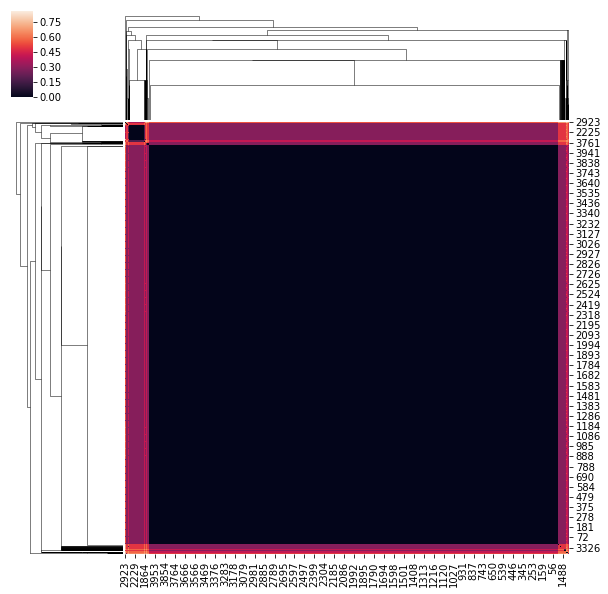

In [13]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced)

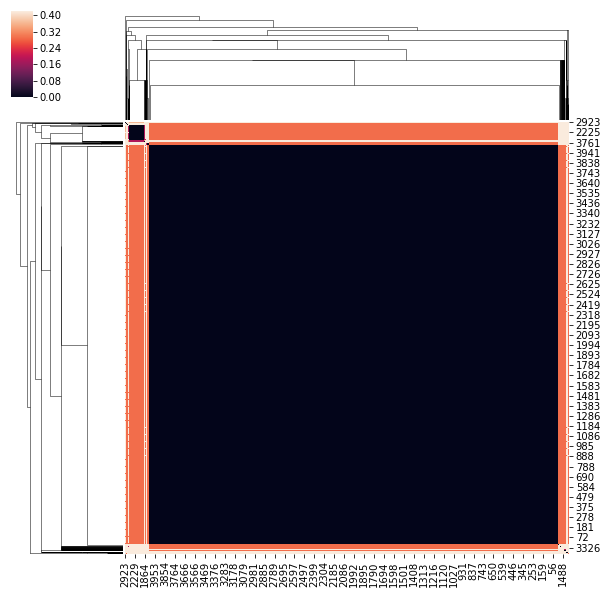

In [14]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True)

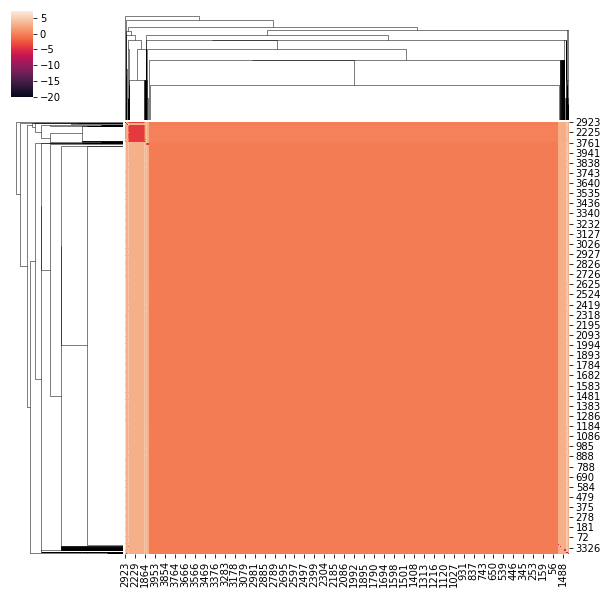

In [15]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, z_score=0)

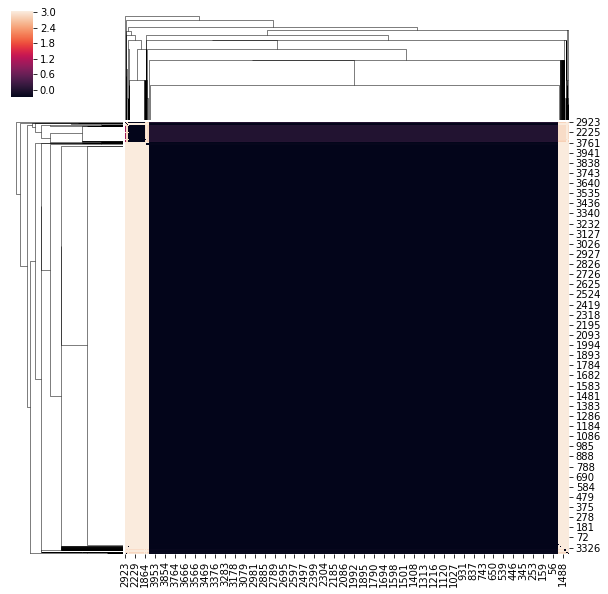

In [16]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True, z_score=0)